# EDA :-> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print("Data Import Successful")

Data Import Successful


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:

•Variable - Variable name.

•Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

•Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

•Expectation - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.

•Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

•Comments - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:
* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:

•OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).

* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). 

## How we met 'SalePrice'

Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. 

That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:

'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!


In [3]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model!

Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'

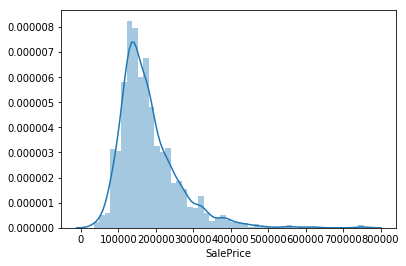

In [4]:
sns.distplot(df_train['SalePrice']) #distribution plot

'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:

•Deviate from the normal distribution.

•Have appreciable positive skewness.

•Show peakedness.

This is getting interesting! 'SalePrice', could you give me your body measures?'

In [5]:
#Skewedness and Kurtosis
print("Skewedness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewedness: 1.882876
Kurtosis: 6.536282


## 'SalePrice', her buddies and her interests

### Relationship with numerical variables

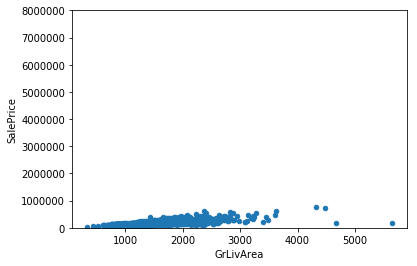

In [6]:
#scatter plot GrLivArea/SalePrice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train['GrLivArea']], axis =1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,8000000))

Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

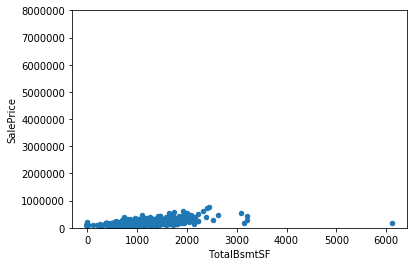

In [7]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,8000000))

'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. 

Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

### Relationship with categorical features

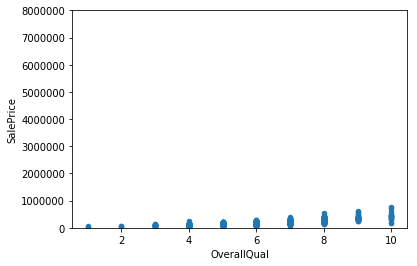

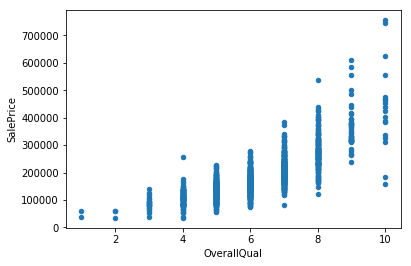

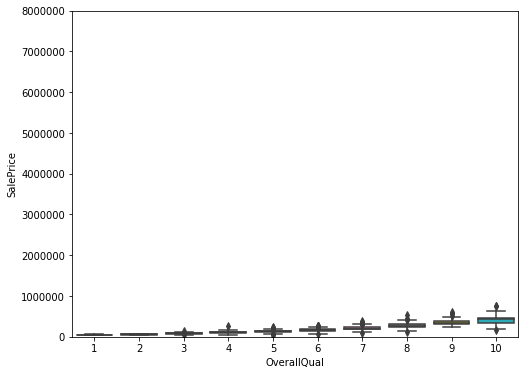

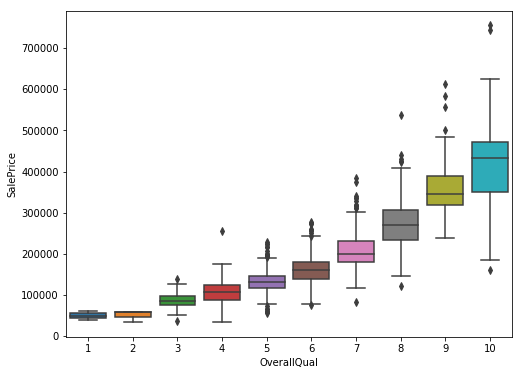

In [8]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis =1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,8000000))

#data = pd.concat([df_train['SalePrice'], df_train[var]],axis =1)
data.plot.scatter(x = var, y = 'SalePrice')

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 8000000)

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
#fig.axis(ymin = 0, ymax = 8000000)

Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date

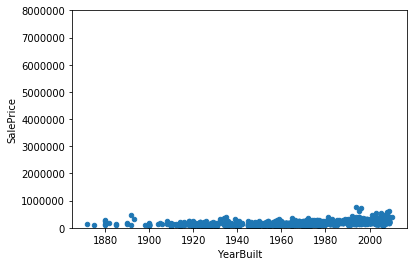

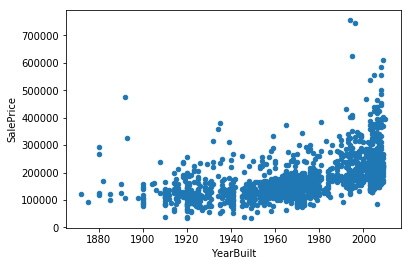

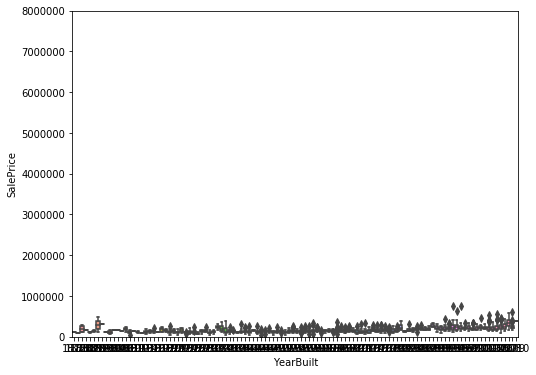

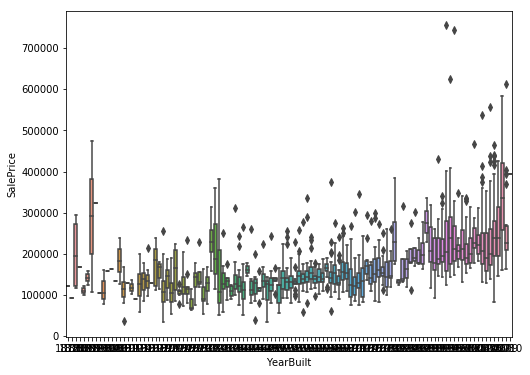

In [9]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis =1)

data.plot.scatter(x = var , y = 'SalePrice', ylim = (0,8000000))

data.plot.scatter(x = var, y = 'SalePrice')

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 8000000)
#plt.xticks(rotation = 90)   

f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
#fig.axis(ymin = 0, ymax = 8000000)
#plt.xticks(rotation = 90)        

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

### In summary

We can conclude that:

•'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. 
    Both relationships are positive, which means that as one variable increases, the other also increases. 
    In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

•'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. 
    The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. 
    The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

### Correlation matrix (heatmap style)

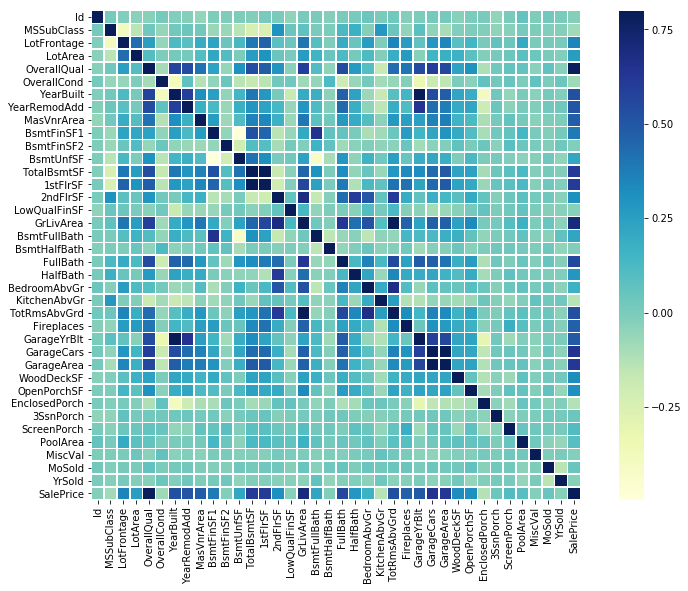

In [10]:
corrmat = df_train.corr()
#will contain all the columns with numeric data

f,ax = plt.subplots(figsize = (14,9))
sns.heatmap(corrmat, vmax = 0.8,linewidth = 0.5, square = True,cmap="YlGnBu")
#linewidth white separators b/w each box

#vmin, vmax = Values to anchor the colormap, 
#otherwise they are inferred from the data 
#and other keyword arguments.

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. 

Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 

If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 

Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. 

We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.


### 'SalePrice' correlation matrix (zoomed heatmap style)

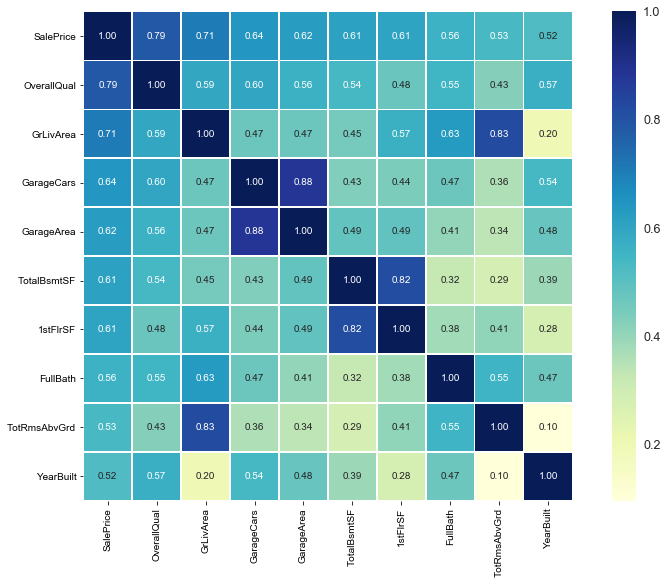

In [11]:
##According to our crystal ball, these are the variables most correlated with 'SalePrice'. 

k = 10 #no. of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #corrmat = original heatmap
##DataFrame.nlargest(n, columns, keep='first')
#Get the rows of a DataFrame sorted by the n largest values of columns/col. Here 'SalePrice'


f,ax = plt.subplots(figsize = (14,9)) #optional
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,linewidth = 0.5, cmap="YlGnBu")
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

•'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

•'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 

'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

•'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

•'FullBath'?? Really? 

•'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

•Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

### Scatter plots between 'SalePrice' and correlated variables 


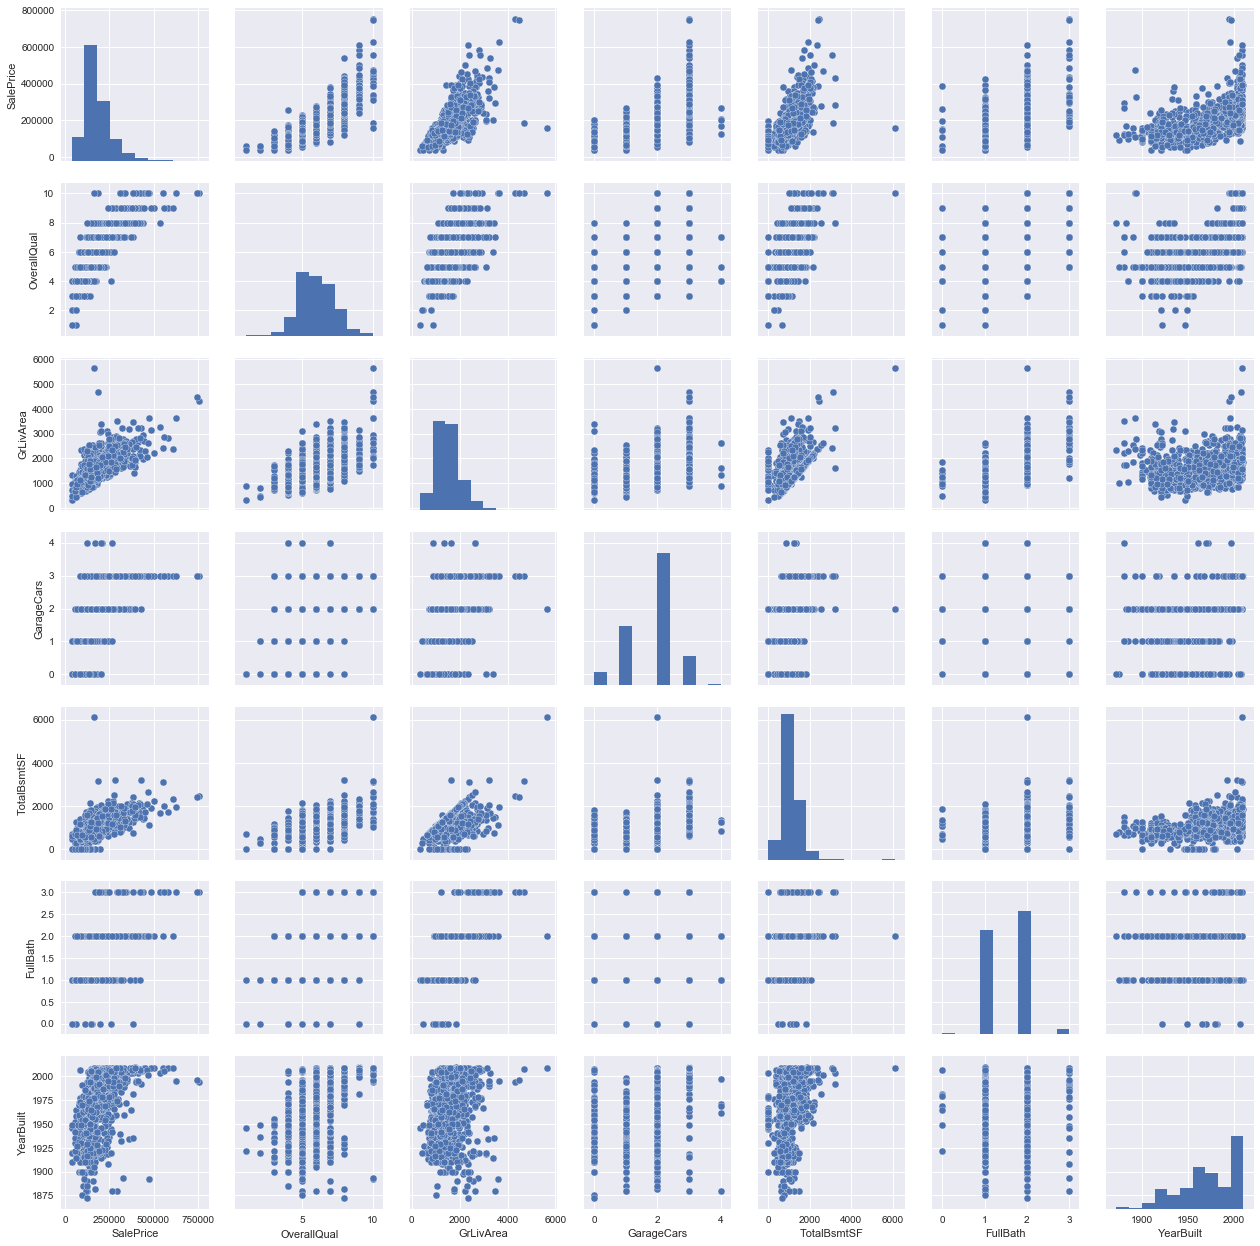

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size = 2.5)
plt.show()

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border.

It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative).

We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).


## Missing data

•How prevalent is the missing data?

•Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. 

This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.


In [13]:
total = df_train.isnull().sum().sort_values(ascending = False)
#total

percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
#percent of missing values outta total values

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.

This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. 

The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). 

Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. 

I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in 5 problems). 

Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.


### Dealing with missing data

In [14]:
df_train = df_train.drop((missing_data[missing_data['Total'] >1]).index, axis = 1)
#axis =1 as we have to remove columns 
#(missing_data[missing_data['Total'] >1]) # >1 because 'Electrical' = 1
#(missing_data[missing_data['Total'] >1]).index #getting column names to remove

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train.loc[df_train['Electrical'].isnull()] #reaching the specific row
#df_train.loc[df_train['Electrical'].isnull()].index #getting the row no.

df_train.isnull().sum().max()#just checking that there's no missing data missing...

0

## Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. 

Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. 

To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [15]:
#standardizing the data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
##StandardScaler(copy=True, with_mean=True, with_std=True)
#Standardize features by removing the mean and scaling to unit variance

#The standard score of a sample x is calculated as:
#z = (x - u) / s
#where u is the mean of the training samples or zero 
#if with_mean=False, and s is the standard deviation of the training samples 
#or one if with_std=False

#fit_transform(X[, y]) Fit to data, then transform it. 

#np.newaxis might come in handy when you want to explicitly convert a 1D array 
#to either a row vector or a column vector

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:-10]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 ...
 [ 3.57582371]
 [ 3.59470548]
 [ 3.70170215]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

### Bivariate Analysis

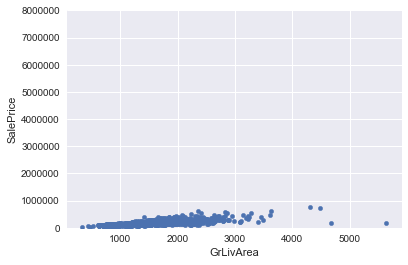

In [16]:
#saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim= (0, 8000000))

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. 

* Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. 

* Therefore, we'll define them as outliers and delete them.

* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. 

* They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [17]:
#deleting outliers
df_train.sort_values(by = ['GrLivArea'], ascending = False)[:2]
#returns top 2 rows

#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
#df_train = df_train.drop(df_train.loc[df_train.sort_values(by = ['GrLivArea'], ascending = False)[:2].index)

#df_train.loc
#df_train.drop(df_train.loc[df_train.sort_values(by = ['GrLivArea'], ascending = False)[:2].index],axis = 0)
#Doesn't works

#index = df_train.sort_values(by = ['GrLivArea'], ascending = False)[:2].index #works
#df_train.loc[df_train.sort_values(by = ['GrLivArea'], ascending = False)[:2].index] #works
#df_train.drop(index = index) #works

df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

print("dropped")

dropped


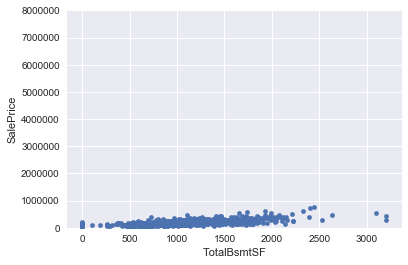

In [18]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0,8000000))

* We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns.

If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

#### In the search for normality

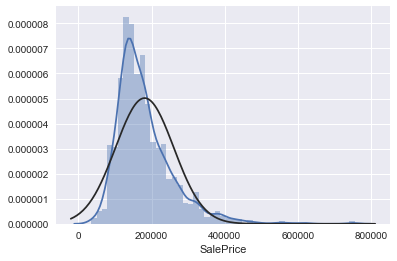

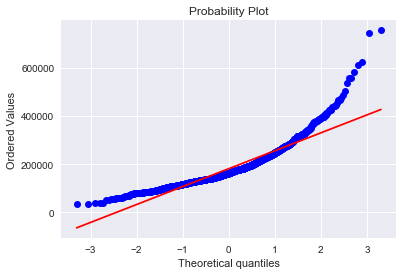

In [19]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well


In [20]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

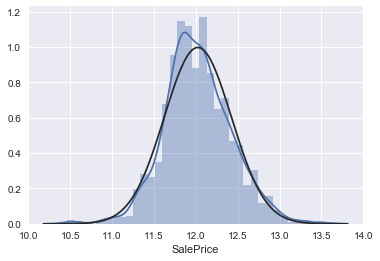

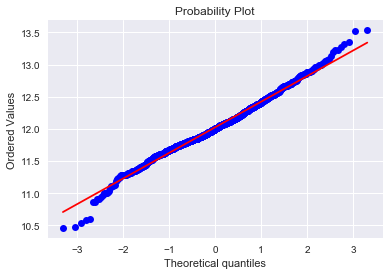

In [21]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'],plot = plt)

In [22]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

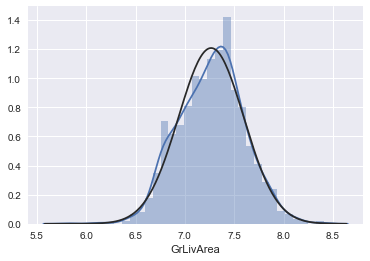

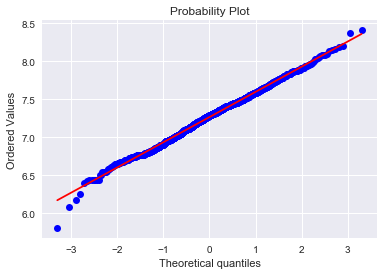

In [23]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'],plot =plt)

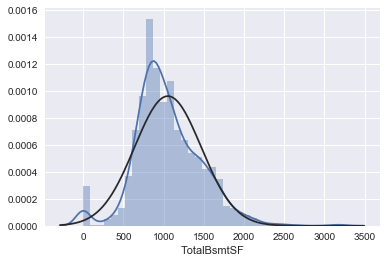

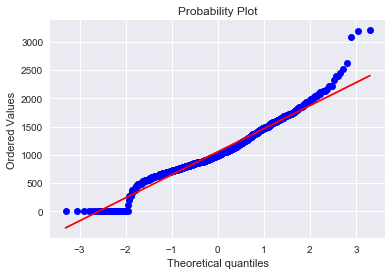

In [24]:
#df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
## Don't use: Converts values to inf

sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

•A significant number of observations with value zero (houses without basement).

•A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). 

Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.


In [25]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']),index = df_train.index)
#has length, i.e. column length = no. of rows, index = index of df_train

df_train['HasBsmt'] = 0 #Assign 0 initially
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1 #1 for those having Bsmt

#df_train.loc[df_train['TotalBsmtSF']>0] #rows with non zero TotalBsmtSF

In [26]:
df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

#df_train.loc['TotalBsmtSF',df_train['HasBsmt']==1] #wrong

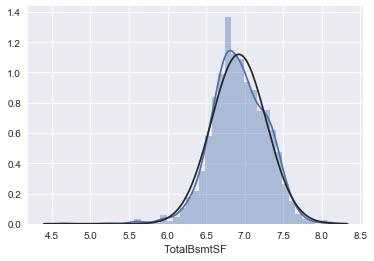

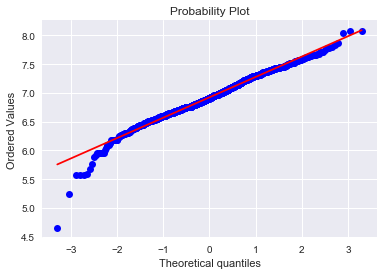

In [27]:
#sns.distplot(df_train['TotalBsmtSF']) #2 peaks
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot = plt)

### In the search for 'homoscedasticity' 

The best approach to test homoscedasticity for two metric variables is graphically.
Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

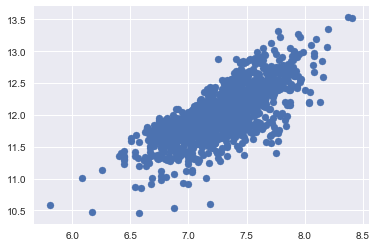

In [28]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)').

As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'

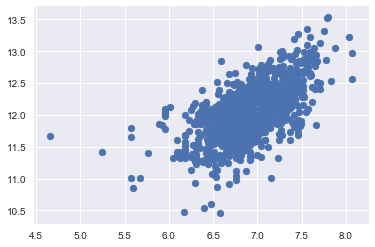

In [29]:
plt.scatter(df_train[df_train['TotalBsmtSF']> 0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']> 0]['SalePrice'])

### Last but not the least, dummy variables

In [30]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
print(df_train.shape)
df_train.head(5)

(1457, 222)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


extract all values greater than correlation matrix python

http://pmarcelino.com/

# EDA: Ends here

# Training & Evaluating Models

### set up

In [31]:
#Save the train_ID
train_ID = df_train['Id']

#drop 'Id' column in train data because it is not a response variable 
df_train = df_train.drop(['Id'], axis=1)

df_train.shape

#Save the test_ID
test_ID = df_test['Id']

#drop 'Id' column in test data because it is not a response variable 
df_test = df_test.drop(['Id'], axis=1)

df_test.shape

(1459, 79)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import ElasticNet, LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
#from sklearn.ensemble import VotingClassifier

%load_ext autoreload
%autoreload 2

#from stacking import stacking_regression
#import xgboost as xgb
#import lightgbm as lgb

### performance_metric

In [33]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """Calculates and returns the performance score between 
    true and predicted values based on metric chosen """
    score = r2_score(y_true, y_predict)
    
    return score

#coefficient of determination aka R^2
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

#print("Model has a coefficient of determination, R^2, of {:.3f}.").format(score)
#print(performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3]))

#print(score)

### train_test_split

In [34]:
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=0)

#### CV

In [35]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)       

### Random Forest

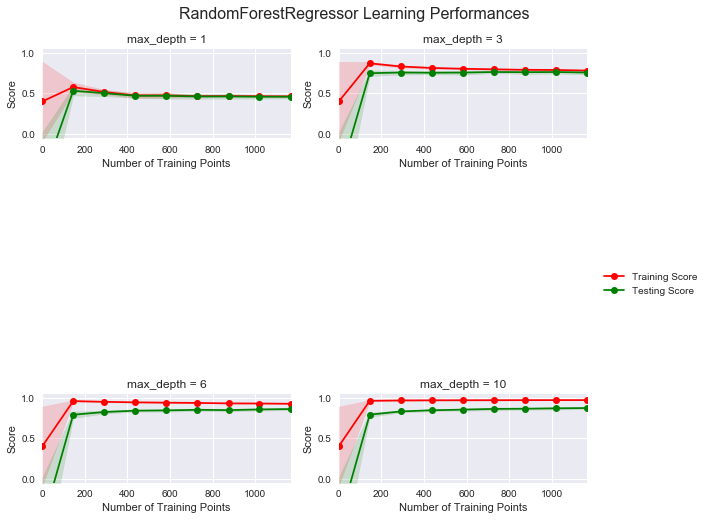

In [36]:
import sklearn.learning_curve as curves
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a RandomForestRegressor at max_depth = depth
        regressor = RandomForestRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('RandomForestRegressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
    
ModelLearning(X,y)    

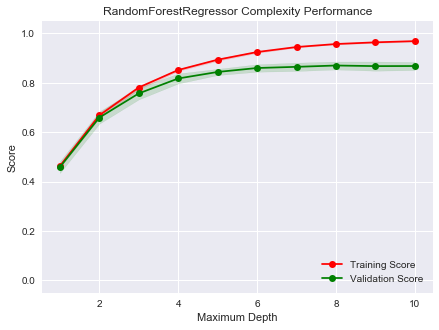

In [38]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(RandomForestRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('RandomForestRegressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

ModelComplexity(X, y)

In [41]:
#Assign this object to the 'regressor' variable.

#from sklearn.tree import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X,y):
    """ Performs grid search over the 'max_depth' parameter for a 
        RandomForestRegressor trained on the input data [X, y]. """
    # Create cross-validation sets from the training data
    #ShuffleSplit(n_splits = 10, test_size =0.1, train_size = None, random_state = None)
    
    cv_sets = ShuffleSplit(X.shape[0],n_iter = 10, test_size = 0.2, random_state = 0)
    
    # TODO: RandomForestRegressor object
    regressor = RandomForestRegressor()
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
     #from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(performance_metric)
    
    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)
    
    #Fit the grid search object
    grid = grid.fit(X,y)
    
    #Return the optimal model after fitting the data
    return grid.best_estimator_

#Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

#Produce the value for 'max_depth'
#print("Parameter 'max_depth' is {} for the optimal model.").format(reg.get_params()['max_depth'])
print("Parameter 'max_depth' for the optimal model is ", reg.get_params()['max_depth'])

Parameter 'max_depth' for the optimal model is  10


#### -Conservative

In [42]:
rand_forest_con = RandomForestRegressor(random_state=0, 
                                        n_estimators=1000,
                                        max_depth=10,  
                                        max_features='sqrt')

rand_forest_con_trainedmodel = rand_forest_con.fit(X_train, y_train)

#%%time

score = rmsle_cv(rand_forest_con_trainedmodel)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest score: 0.1476 (0.0198)



In [48]:
predictions = rand_forest_con.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

ValueError: Unknown label type: (411     11.884489
211     12.133502
342     11.379394
303     11.917724
159     12.676076
1047    11.884489
971     12.061047
233     11.761347
254     11.884489
1317    12.249611
635     12.206073
1155    12.292250
616     12.118334
31      11.914048
1122    11.626254
1071    11.944708
279     12.165251
107     11.652687
310     12.017331
591     13.021327
34      12.533576
758     12.097373
1027    12.588191
52      11.608236
223     11.482466
865     11.908340
680     11.870600
1100    11.002100
1351    12.049419
1032    12.644328
          ...    
1164    12.175613
960     11.665647
278     12.936752
990     12.759958
124     12.106252
198     11.552146
1271    12.132157
1319    11.617285
655     11.385092
747     12.491173
1374    12.429216
1028    11.561716
520     11.573550
1287    12.154779
1441    11.913713
1001    11.362103
1221    11.805595
420     12.237087
319     12.141534
434     11.302204
687     11.910358
1420    12.100156
61      11.522876
494     11.421906
467     11.894781
92      12.004568
1184    12.137258
295     11.867097
919     12.081076
40      11.982929
Name: SalePrice, Length: 292, dtype: float64, array([11.78021549, 12.04880971, 11.45152489, 11.80279677, 12.46749185,
       11.88244048, 12.06030587, 11.75941242, 11.83400913, 12.15735265,
       11.97518207, 12.12220316, 12.14916344, 11.84248102, 11.51455303,
       11.95968269, 12.17255449, 11.61074761, 12.11395871, 12.85332292,
       12.48899076, 12.02779694, 12.55622501, 11.5504616 , 11.74547823,
       11.80145531, 11.75301142, 11.17367887, 12.02113585, 12.62359747,
       11.8954013 , 11.87124634, 12.36364566, 12.17229668, 12.87391174,
       11.88354007, 11.66442693, 11.7725283 , 11.92285667, 11.64205072,
       11.85116448, 12.17285179, 12.47116024, 11.85202343, 12.05859604,
       12.29516186, 12.39878773, 11.8035324 , 11.73569164, 12.38800602,
       12.43113987, 11.70759559, 11.71834953, 11.82070462, 12.81279936,
       12.31231072, 12.56126448, 11.77253218, 12.21767903, 11.74336558,
       11.72297813, 11.74547313, 11.67669799, 12.09311548, 11.73362191,
       12.12234015, 12.6663438 , 11.93084203, 12.26071273, 12.06393835,
       12.08491345, 12.32674752, 11.62982911, 12.02755453, 12.69728936,
       12.4142051 , 11.36979132, 11.43269985, 11.90276838, 11.94276522,
       11.84212581, 11.87379643, 12.43223764, 12.00819392, 12.03691042,
       12.18289577, 11.74811741, 11.8893512 , 11.89897336, 11.91233573,
       12.46894983, 11.91474152, 11.73404579, 11.76104264, 12.66252412,
       11.48743687, 12.45549435, 11.91117105, 11.80597716, 12.07197459,
       11.84853167, 11.67830507, 12.20155106, 11.86389617, 11.96212196,
       12.11133034, 12.11596772, 12.30172354, 12.61410852, 12.40379528,
       11.62039224, 11.86782963, 12.30272631, 11.68758023, 12.40334973,
       11.70598485, 12.17439868, 12.27209466, 12.45163891, 11.81568773,
       12.2419641 , 11.97786089, 11.52644907, 11.64663147, 12.28657444,
       12.16074801, 11.7388958 , 12.28331855, 12.46698927, 11.9205193 ,
       12.62343623, 11.82974705, 12.2084824 , 12.44644013, 12.20595222,
       12.26345665, 12.54335813, 11.88669613, 11.77686018, 12.24471377,
       12.50268089, 11.8555231 , 11.9724721 , 11.77024643, 12.07241336,
       11.78479084, 12.05619862, 12.15535255, 11.8424137 , 11.95853841,
       11.77659121, 11.73769794, 12.2093174 , 11.88007987, 12.13494819,
       12.1138453 , 12.11449655, 11.65161672, 12.88397208, 11.87335108,
       11.46287713, 11.95024037, 12.76247993, 11.82028679, 11.97973056,
       12.15534463, 12.18470506, 11.67018994, 11.43807657, 11.96787086,
       11.81234574, 12.07944765, 11.77677265, 12.54653295, 12.89333073,
       11.54333625, 11.8899866 , 12.14841348, 11.52447596, 11.66097292,
       11.86702862, 11.88673391, 12.22819871, 12.26447483, 12.45763867,
       12.03533061, 12.28778562, 11.99946966, 11.82915861, 11.79360595,
       11.40185091, 11.76716442, 11.90123386, 11.51629795, 11.86209307,
       11.79195455, 11.91909195, 11.73914102, 11.80553932, 11.95698832,
       11.8428395 , 11.86154272, 12.21228717, 12.52270633, 11.75062958,
       11.89077321, 12.1379528 , 12.38438622, 12.345279  , 12.51758327,
       12.15608314, 11.7634845 , 12.39297562, 11.70404042, 12.51835581,
       11.56635357, 11.91341816, 11.91539503, 11.8917182 , 12.08482404,
       11.66190215, 11.80232879, 11.98909598, 11.79210266, 12.16623036,
       11.98817643, 11.50233435, 11.60939204, 11.60148497, 11.5923437 ,
       12.29720018, 12.27187117, 11.96327701, 12.15736904, 12.23278293,
       11.96717655, 11.96494041, 12.21801568, 11.96414206, 12.22595276,
       12.34574246, 12.69018204, 11.73009371, 11.73654059, 11.60731943,
       11.95221887, 12.19897819, 12.18173074, 11.73040863, 12.18193654,
       12.16019527, 11.68018099, 11.75382006, 12.09142288, 11.88580354,
       12.21771322, 12.18801212, 11.26351545, 12.01926605, 11.84598571,
       11.30057185, 11.70817537, 12.08651294, 11.67744393, 12.76035968,
       12.56403997, 12.07404518, 11.73982937, 12.05713688, 11.69672153,
       11.51255108, 12.28253559, 12.42594087, 11.76689662, 11.592374  ,
       12.01806059, 11.89206691, 11.49794114, 11.80895225, 12.10791299,
       12.1145915 , 11.42556834, 12.02239815, 12.00430897, 11.50628579,
       11.5851213 , 11.96317036, 11.80103318, 12.09945084, 11.88664114,
       12.04002787, 11.92553994]))

#### -Aggressive

In [43]:
rand_forest_agr = RandomForestRegressor(random_state=0, 
                                        n_estimators=100,
                                        max_depth=15,
                                        max_features='auto')

rand_forest_agr_trainedmodel = rand_forest_agr.fit(X_train, y_train)

score = rmsle_cv(rand_forest_agr_trainedmodel)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest score: 0.1403 (0.0146)



In [47]:
#test_pred = test.predict(df_test)
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print('Trial {}:, ${.2f}'.format(k+1,pred))


    # Display price range
    print ("\nRange in prices: ${:,.2f}").format(max(prices) - min(prices))

#PredictTrials(X, y, fit_model, df_test)